# **1. 단순 선형 회귀(Linear Regression)**

## **1-1. 단순 선형 회귀 식에서 각각 w0과 w1가 의미하는 바를 적으세요.**
$$f(x) = w_0 + w_1 *x$$


- **w0**: 절편
- **w1**: 기울기

## **1-2. RSS(Residual Sum of Square)의 회귀 식을 작성할 때, 어떤 것을 중심으로 식이 작성되나요?**

$$RSS(w_0, w_1) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (w_0 + w_1 * x_i))^2$$

**답안**  
: 주어진 데이터셋과 모델의 예측값에 중심을 두고 작성됨





## **1-3. LinearRegression 클래스를 활용하여 `보스턴 주택 가격`을 예측하는 알고리즘을 구현하려 합니다. 이때, 이 클래스는 어떤 방식으로 구현되었나요?**

**답안**  
: 이 클래스는 최소 제곱법을 기반으로 제곱의 합을 최소화하는 방향으로 진행함니따라서  방식으로 LinearRegression 클래스는 주어진 특성에 따라 보스턴 주택 가격과 같은 연속형 타겟 함 있습니다.

## **1-4. 아래 코드의 빈칸을 채워 코드를 완성해 주세요.**

In [1]:
# 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [2]:
# boston 데이터셋 준비
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 데이터 세트의 target 배열은 주택 가격임.
# 이를 PRICE 칼럼으로 DataFrame에 추가함.

bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기: ' , bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Axes: xlabel='RAD', ylabel='PRICE'>

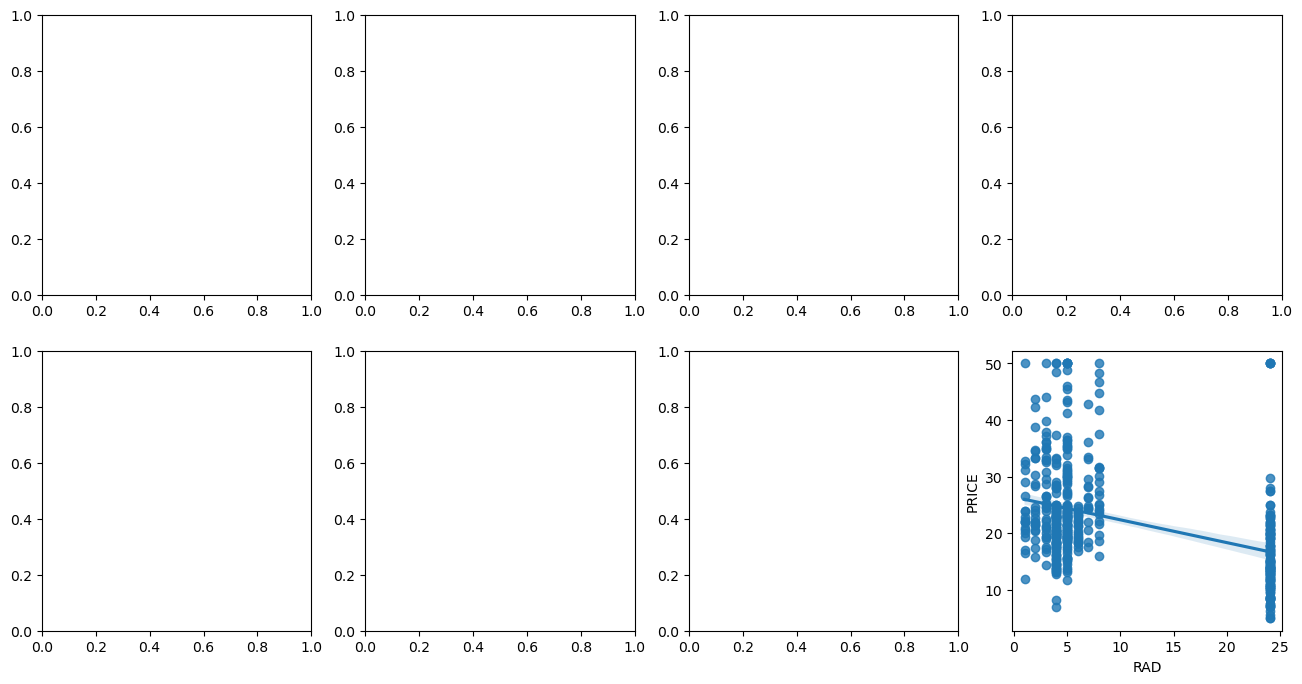

In [3]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해보기.

# 2개의 행과 4개의 열을 가진 Subplots를 이용.
# axs는 4x2개의 ax를 가짐.

fig, axs=plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features =['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

## **1-5. RM과 LSTAT의 PRICE와의 관계에 대해 `선형성`을 바탕으로 서술하세요.**



In [4]:
# LinearRegression 클래스를 이용하여 보스턴 주택 가격의 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)

# 선형 회귀 0LS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMES : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 21.517, RMES : 4.639
Variance score : 0.711


In [5]:
# intercept값(절편)과 coefficients값(회귀 계수) 확인

print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', lr.coef_)

절편 값:  31.6310840356937
회귀 계수값:  [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


**[RM과 PRICE]**

:절편 값: -34.11739972322467
회귀 계수값: [ 8.56610034]

**[LSTAT과 PRICE]**

절편 값: 33.22276053179232
회귀 계수값: [-0.96895382]:

# **2. 경사 하강법(Gradient Descent)**

간단한 회귀 식인 $y = 6x + 8$을 근사하기 위한 200개의 데이터 세트를 만들고, 여기에 `경사 하강법`을 이용해 회귀 계수 $w_1$, $w_0$을 도출하는 파이썬 코드를 작성해 봅시다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **2-1. 노이즈를 위한 난수를 생성해 주세요.**

In [7]:
np.random.seed(0)

## **2-2. $y = 6x + 8$ 식을 근사하는 코드를 작성해 주세요.**

In [8]:
X = 2 * np.random.rand(200, 1)
y = 6 * X + 8 + np.random.randn(200, 1) * 2

## **2-3. X, y 데이터 세트를 산점도로 시각화 해주세요.**

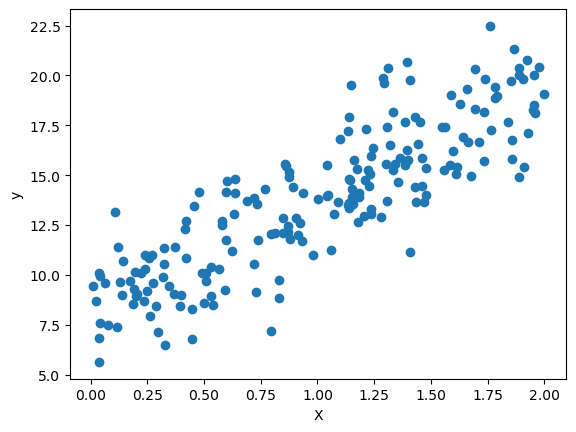

In [9]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## **2-4.**
실제 y값과 예측된 y값을 인자로 받아 $$\frac{1}{N} \displaystyle\sum_{i=1}^{N}{(실제값_i-예측값_i)^2}$$ 식을 계산하는 비용함수 `get_cost()`를 정의해 주세요.

In [10]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

## **2-5.**
`w1_update`로 $$-u\frac{2}{N} \displaystyle\sum_{i=1}^{N}x_1*{(예측오류_i)}$$  
`w0_update`로 $$-u\frac{2}{N} \displaystyle\sum_{i=1}^{N}{(예측오류_i)}$$ 값을 넘파이의 dot 행렬 연산으로 계산한 뒤 이를 반환하는 `get_weight_update` 함수를 정의해 주세요.

In [11]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    w0_factors = np.ones((N, 1))

    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

## **2-6. `get_weight_update()`을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수인 `gradient_descent_steps()` 함수를 생성해 주세요.**

In [12]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

## **2-7. `gradient_descent_steps()`를 호출해 w1과 w0를 구해보세요. 그리고 앞서 정의한 `get_cost()` 함수를 이용해 경사 하강법의 예측 오류를 계산해 보세요.**

In [13]:
w1, w0 = gradient_descent_steps(X, y)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:5.562 w0:8.214
Gradient Descent Total Cost:3.6523


## **2-8. `y_pred`에 기반해 회귀선을 그려보세요.**

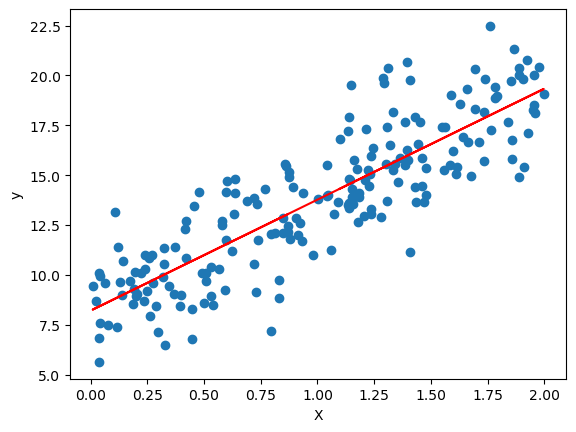

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# **3. 다항 회귀**

## **3-1. `PolynomialFeatures`를 이용해 단항값 $[x_1, x_2]$ 를 2차 다항값 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$ 로 변환하는 코드를 작성해 봅시다.**

In [15]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([[0, 11], [2, 31]])
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print ('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[ 0 11]
 [ 2 31]]
변환된 2차 다항식 계수 피처:
 [[  1.   0.  11.   0.   0. 121.]
 [  1.   2.  31.   4.  62. 961.]]


## **3-2. `PolynomialFeatures`와 `LinearRegression` 클래스를 이용해 3차 다항 회귀 코드를 작성해 봅시다.**

**이때 회귀의 결정 함수식은 $ y=1+4x_1^2+3x_2^3$ 입니다.**

### **step 1.**
해당 결정 함수식을 위한 `polynomial_func()` 함수를 작성해주세요. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환합니다.

In [16]:
def polynomial_func(X):
    y = 1 + 4*X[:,0]**2 + 3*X[:,1]**3
    return y

In [17]:
X = np.array([[0, 1], [2, 3]])
print('일차 단항식 계수: \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [ 4 98]


### **step 2.**
일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하여 다항 회귀로 구현해 주세요.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
poly_ftr = poly.fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.14 0.14 0.28 0.42 0.56 0.56 0.85 1.27 1.83]
Polynomial 회귀 Shape : (10,)


# **4. 규제 선형 회귀**

- 사이킷런에서 제공하는 `당뇨병` 데이터 세트로 실습을 진행합니다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()

# diabetes 데이터셋 DataFrame 변환
diabetesDF = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# diabetes 데이터셋의 target array는 당뇨병 진행 정도를 나타냄. 이를 target 컬럼으로 DataFrame에 추가함.
diabetesDF['target'] = diabetes.target

print('Diabetes 데이타셋 크기:', diabetesDF.shape)
diabetesDF.head()

Diabetes 데이타셋 크기: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 타겟 변수 설정
y_target = diabetesDF['target']

# 특성 변수 설정
X_data = diabetesDF.drop(['target'], axis=1, inplace=False)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

## **4-1. `get_linear_reg_eval()` 함수를 완성해 주세요.**

In [21]:
def get_linear_reg_eval(model_name, params, X_data, y_target, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': 
            model = Ridge(alpha=param)
        elif model_name =='Lasso': 
            model = Lasso(alpha=param)
        elif model_name =='ElasticNet': 
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))

        model.fit(X_data, y_target)

        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df


## **4-2. `alpha = 0.07`일 때의 라쏘 모델을 수행하세요.**

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_alphas = [0.07]

coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data=X_data, y_target=y_target)


#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 54.734 


## **4-3. 엘라스틱넷 회귀 모델에서 다음의 alpha 값 후보 중에서 alpha 의 값이 얼마일 때 가장 좋은 예측 성능을 보이는 지 RMSE 값과 함께 답하세요.**

- 조건: `alpha = [0.01, 0.1, 1]`


In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elastic_alphas = [0.01, 0.1, 1]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data=X_data, y_target=y_target)


#######  ElasticNet #######
alpha 0.01일 때 5 폴드 세트의 평균 RMSE: 58.740 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 71.268 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 76.805 


**답안**  
: alpha가 0.01일 때 가장 작은 RMSE값을 가지므로 가장 좋은 예측 성능을 보인다.

## **4-4. `get_scaled_data()` 함수를 완성하세요.**

In [25]:
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(input_data)

    elif method == 'MinMax':
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(input_data)

    elif method == 'Log':
        scaled_data = np.log1p(input_data)

    else:
        scaled_data = input_data

    if p_degree is not None:
        poly = PolynomialFeatures(degree=p_degree)
        scaled_data = poly.fit_transform(scaled_data)

    return scaled_data

# **5. 로지스틱 회귀**
- 사이킷런에서 제공하는 `와인 등급` 데이터 세트로 로지스틱 회귀 분석 실습을 진행합니다.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

df = load_wine()
X, y = df.data, df.target

## **5-1. 정규 분포 형태의 표준 스케일링을 적용한 후 학습/테스트 데이터 세트로 분리해 주세요.**

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# 아래에 코드를 입력해주세요
data_scaled = scaler.fit_transform(diabetesDF)

# 괄호 안에 빈칸 채워주세요.
# test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(data_scaled, diabetes.target, test_size=0.3, random_state=0)

## **5-2. 로지스틱 회귀를 이용해 학습 및 예측을 수행해 주세요.**

In [28]:
# 아래 코드를 완성해 주세요.

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

## **5-3. 모델의 정확도를 확인해 주세요.**

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_preds)
r2 = r2_score(y_test, lr_preds)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 4.28039485943922e-27
R-squared: 1.0


## **5-4. `GridSearchCV`를 이용해 와인 등급 데이터 하이퍼 파라미터 최적화를 진행해 주세요.**

- solver: ['liblinear', 'lbfgs']
- penalty: ['l2', 'l1']
- C: [0.01, 0.1, 1, 1, 5, 10]

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# LogisticRegression 모델 생성
lr_clf = LogisticRegression()

# 탐색할 파라미터 설정
params = {
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 5, 10]
}

# GridSearchCV 객체 생성
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)

# GridSearchCV 수행
grid_clf.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print('최적 하이퍼 파라미터:', grid_clf.best_params_)
print('최적 평균 정확도:', grid_clf.best_score_)


최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
최적 평균 정확도: 0.01941747572815534


# **6. 회귀 트리**
- 캘리포니아 주택 가격 데이터셋을 활용하겠습니다.

In [1]:
# 코드를 실행해주세요
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#캘리포니아 데이터 세트 로드
housing = fetch_california_housing()
housingDF = pd.DataFrame(housing.data, columns=housing.feature_names)

## **6-1. 회귀 트리 모델을 생성한 후 3번의 교차 검증을 수행하겠습니다.**
- 약 7분 정도 소요됩니다.

In [ ]:
housingDF['PRICE'] = housing.target
y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('3 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('3 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))


## **6-2. `랜덤 포레스트`, `결정 트리`, `GBM`, `XGBoost`, `ightGBM`을 모두 이용해서 캘리포니아 주택 가격 예측을 수행하겠습니다.**
- 약 4분 정도 소요됩니다.

In [ ]:
#코드를 실행해 주세요.

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=2)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('###', model.__class__.__name__, '####')
  print('2 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(random_state=0, n_estimators=100)
lgb_reg = LGBMRegressor(random_state=0, n_estimators=100)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

## **6-3. 피처 중요도를 시각화 해보겠습니다.**

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

### **step 1. 선형 회귀와 회귀 트리 비교해 시각화**

- 캘리포니아 데이터 개수 100개만 샘플링
- 2차원 평면상으로 가장 중요한 변수 1개만 추출 (피처 중요도 시각화 참고)
- 회귀 트리 1은 max_depth=2
- 회귀 트리 2는 max_depth=7
- 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

housingDF_sample = housingDF[['MedInc', 'PRICE']]
housingDF_sample = housingDF_sample.sample(n=100, random_state=0)

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2, random_state=0)
rf_reg7 = DecisionTreeRegressor(max_depth=7, random_state=0)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = housingDF_sample[['MedInc']].values.reshape(-1,1)
y_target = housingDF_sample[['PRICE']].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


### **step 2. 각각의 학습된 Regression에서 예측된 PRICE 회귀선 그리기**

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(housingDF_sample['MedInc'], housingDF_sample['PRICE'], c="fuchsia")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(housingDF_sample['MedInc'], housingDF_sample['PRICE'], c="fuchsia")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(housingDF_sample['MedInc'], housingDF_sample['PRICE'], c="fuchsia")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

**문제**  
시각화를 한 후 가장 중요한 피처가 어느 것이고 종속 변수인 PRICE와 무슨 관계를 나타내는지 짧게 서술하시오.

**답안**  
: 위의 시각화를 통해 가장 중요한 피처는 'MedInc'인 것을 알 수 있음 'MedInc'는 주택 소유자의 중위 소득을 나타내는 피처로,  중위 소득이 높을수록 주택 가격이 높아짐